In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



df = pd.read_csv('/Users/chaotzuchieh/Desktop/CAP5771_Project/Data/CO2_emission_by_countries.csv', encoding='latin-1')


In [2]:
df.head()


,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [3]:
df.shape

(59620, 9)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


,Year,CO2 emission (Tons),Population(2022),Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


In [5]:
#There is no meaning in Code and Calling Code
df = df.drop(columns=['Code','Calling Code'])

In [6]:
#Focus on G20
g20_countries = [
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "China",
    "France",
    "Germany",
    "India",
    "Indonesia",
    "Italy",
    "Japan",
    "Mexico",
    "Russia",
    "Saudi Arabia",
    "South Africa",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States"
]


In [7]:
# Check if all G20 countries are in the dataset
g20_missing = [country for country in g20_countries if country not in df['Country'].values]
print("\n Missing G20 country:")

if g20_missing:
    print("There are missing G20 countries in the dataset")
    print(g20_missing)
else:
    print("There are no missing G20 countries in the dataset")



 Missing G20 country:
There are no missing G20 countries in the dataset


In [8]:
df = df[df['Country'].isin(g20_countries)]

In [9]:
# Only G20 Countries left
unique_countries = df['Country'].unique()
print(unique_countries)

['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Russia' 'Saudi Arabia'
 'South Africa' 'South Korea' 'Turkey' 'United Kingdom' 'United States']


In [10]:
#To ensure alignment with the other two datasets, it is necessary to retain the data spanning the years 2000 to 2020.
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

In [11]:
df.head(10)

,Country,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
2418,Argentina,2000,4.979455e+09,45510318.0,2780400.0,1.80%,16/km²
2419,Argentina,2001,5.113459e+09,45510318.0,2780400.0,1.80%,16/km²
2420,Argentina,2002,5.237851e+09,45510318.0,2780400.0,1.80%,16/km²
2421,Argentina,2003,5.372482e+09,45510318.0,2780400.0,1.80%,16/km²
2422,Argentina,2004,5.529525e+09,45510318.0,2780400.0,1.80%,16/km²
2423,Argentina,2005,5.690960e+09,45510318.0,2780400.0,1.80%,16/km²
2424,Argentina,2006,5.865569e+09,45510318.0,2780400.0,1.80%,16/km²
2425,Argentina,2007,6.039814e+09,45510318.0,2780400.0,1.80%,16/km²
2426,Argentina,2008,6.227920e+09,45510318.0,2780400.0,1.80%,16/km²
2427,Argentina,2009,6.406870e+09,45510318.0,2780400.0,1.80%,16/km²


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 2418 to 57180
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              399 non-null    object 
 1   Year                 399 non-null    int64  
 2   CO2 emission (Tons)  399 non-null    float64
 3   Population(2022)     399 non-null    float64
 4   Area                 399 non-null    float64
 5   % of World           399 non-null    object 
 6   Density(km2)         399 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 24.9+ KB


In [13]:


# Clean the '% of World' column - convert from string '1.80%' to float 0.018
df['% of World'] = df['% of World'].apply(lambda x: float(x.replace('%', '')) / 100 if isinstance(x, str) else x)
df.rename(columns={'% of World': 'proportion of global land area'}, inplace=True)


# Clean the 'Density(km2)' column - extract numeric value and rename
def extract_density(value):
    if isinstance(value, str):
       match = re.search(r'(\d+)', value)
       if match:
              return int(match.group(1))
    return value


# Extract numeric values first
df['Density(km2)'] = df['Density(km2)'].apply(extract_density)

# Rename the column to the requested format
df.rename(columns={'Density(km2)': 'Density(Square kilometre)'}, inplace=True)
df.rename(columns={'Area': 'Area(Square kilometre)'}, inplace=True)



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 2418 to 57180
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         399 non-null    object 
 1   Year                            399 non-null    int64  
 2   CO2 emission (Tons)             399 non-null    float64
 3   Population(2022)                399 non-null    float64
 4   Area(Square kilometre)          399 non-null    float64
 5   proportion of global land area  399 non-null    float64
 6   Density(Square kilometre)       399 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 24.9+ KB


In [15]:
df.head(30)

,Country,Year,CO2 emission (Tons),Population(2022),Area(Square kilometre),proportion of global land area,Density(Square kilometre)
2418,Argentina,2000,4.979455e+09,45510318.0,2780400.0,0.018,16
2419,Argentina,2001,5.113459e+09,45510318.0,2780400.0,0.018,16
2420,Argentina,2002,5.237851e+09,45510318.0,2780400.0,0.018,16
2421,Argentina,2003,5.372482e+09,45510318.0,2780400.0,0.018,16
2422,Argentina,2004,5.529525e+09,45510318.0,2780400.0,0.018,16
2423,Argentina,2005,5.690960e+09,45510318.0,2780400.0,0.018,16
2424,Argentina,2006,5.865569e+09,45510318.0,2780400.0,0.018,16
2425,Argentina,2007,6.039814e+09,45510318.0,2780400.0,0.018,16
2426,Argentina,2008,6.227920e+09,45510318.0,2780400.0,0.018,16
2427,Argentina,2009,6.406870e+09,45510318.0,2780400.0,0.018,16


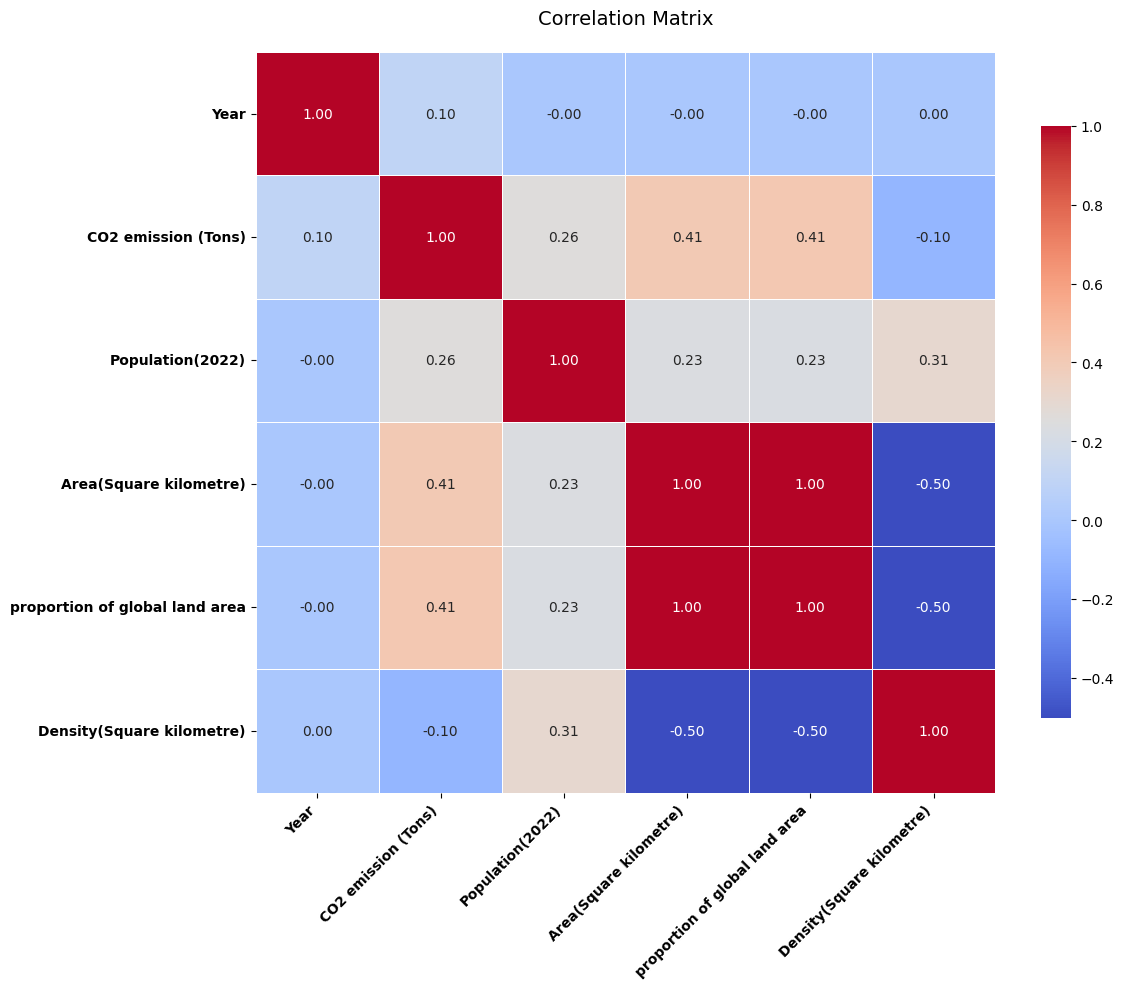

In [16]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
ax = plt.gca()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8}
)


plt.title("Correlation Matrix", fontsize=14, pad=20)
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10,
    fontweight='bold'
)
plt.yticks(
    rotation=0,
    fontsize=10,
    fontweight='bold'
)


ax.set_xticks([x + 0.5 for x in range(len(correlation_matrix))])
ax.set_yticks([y + 0.5 for y in range(len(correlation_matrix))])
ax.grid(visible=False)


plt.tight_layout()

plt.show()

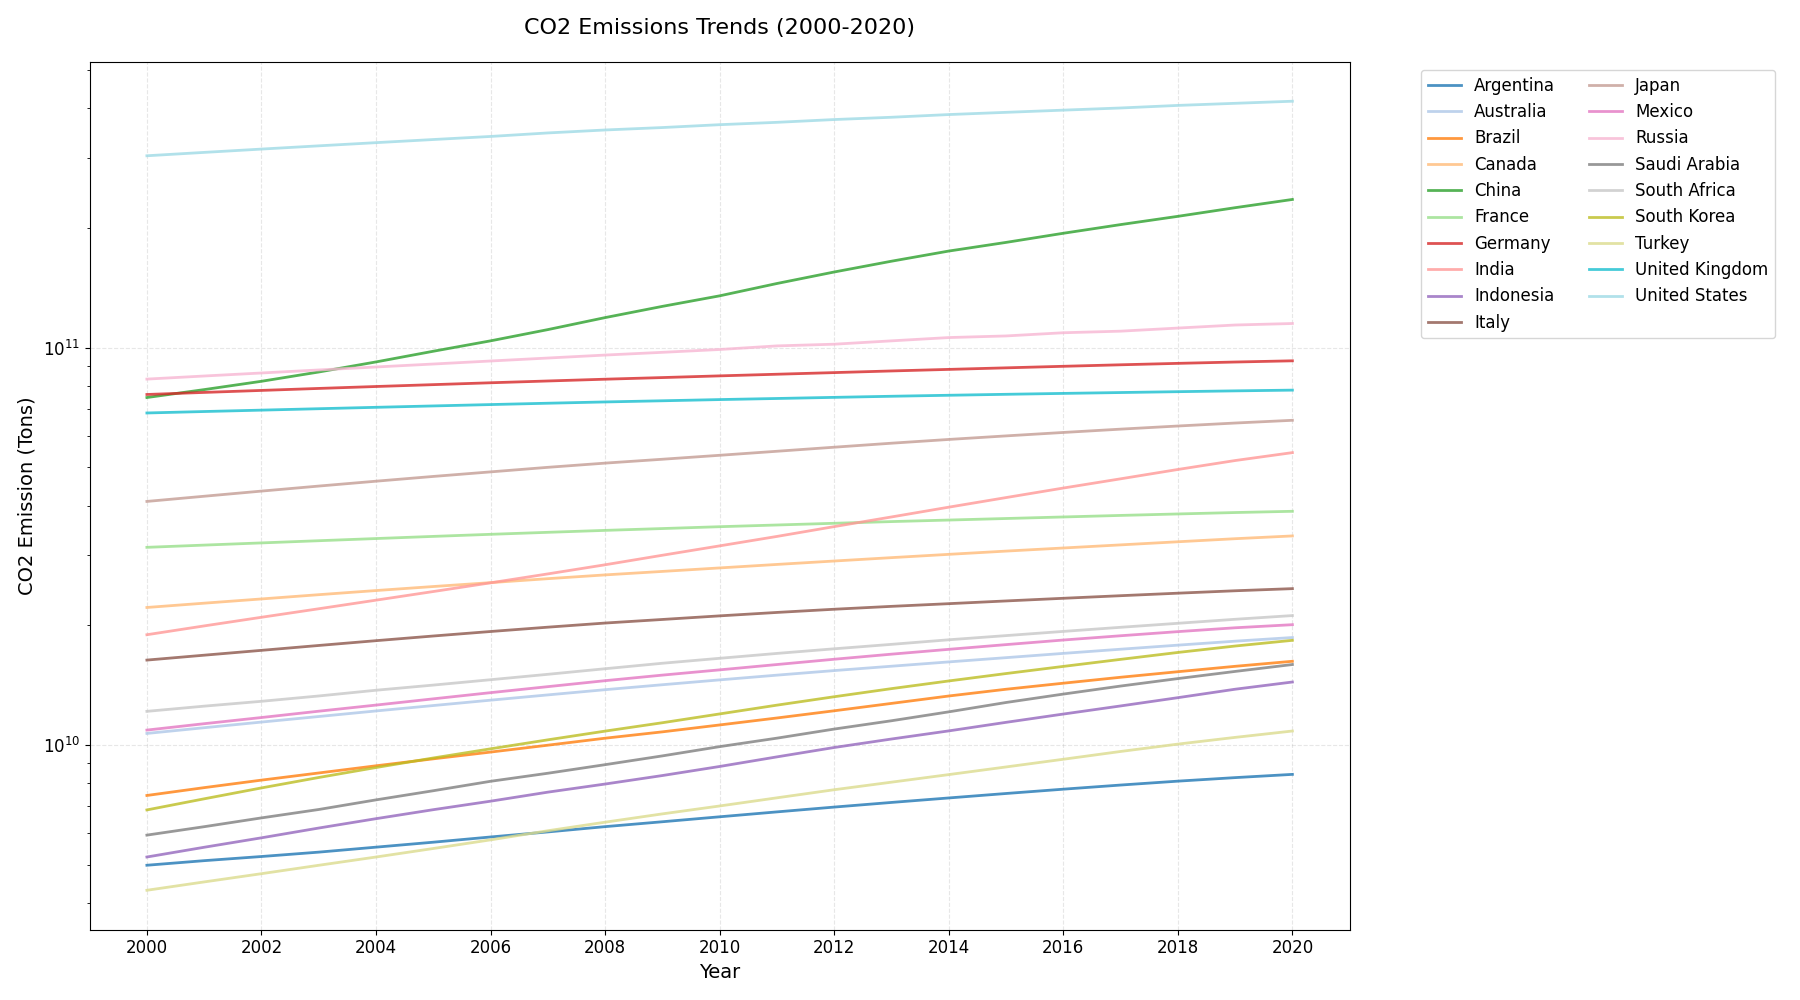

In [17]:
# C02 trends

# interactive
%matplotlib widget
!pip install mplcursors
!pip install ipympl
import mplcursors
import matplotlib.pyplot as plt
import numpy as np

# 假設 g20_countries 和 df 已經定義
colors = plt.cm.tab20(np.linspace(0, 1, len(g20_countries)))

plt.figure(figsize=(18, 10))
plt.rcParams.update({'font.size': 12})

# Create a list to store the line objects
lines = []

# Then in your plotting loop:
for idx, country in enumerate(g20_countries):
    country_data = df[df["Country"] == country]
    line, = plt.plot(
        country_data["Year"],
        country_data["CO2 emission (Tons)"],
        label=country,
        color=colors[idx],
        linewidth=2,
        alpha=0.8
    )
    lines.append(line)  # Store the line object

plt.xticks(range(2000, 2021, 2))
plt.title("CO2 Emissions Trends (2000-2020)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Emission (Tons)", fontsize=14)
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.3)

# interactive
cursor = mplcursors.cursor(lines, hover=True)  #  linked

# This is a decorator that connects a function to the cursor's "add" event, which happens when the cursor selects a data point.
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set_text(sel.artist.get_label())
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)
plt.tight_layout()
plt.show()

In [36]:
df.to_csv('New_CO2_emission_by_countries.csv', index=False)